In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

**I. Manipulation d'images**

In [23]:
imgBefore = cv.imread("ressources/Ibefore.png",0)
imgAfter = cv.imread("ressources/Iafter.png",0)

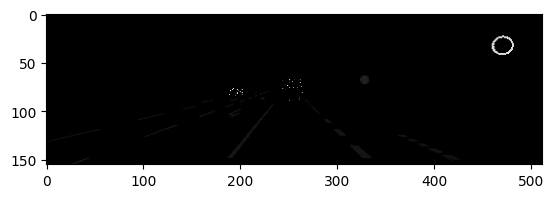

In [25]:
imgDiff = abs(imgAfter-imgBefore)

plt.imshow(imgDiff, cmap="gray")

**II. Modification dynamique d'histogramme**

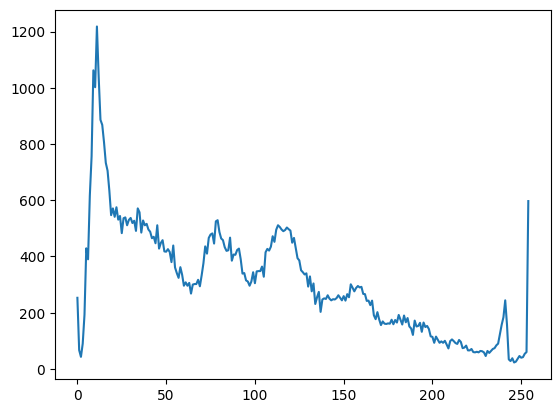

In [26]:
imgsplit = cv.split(imgAfter)
histo = cv.calcHist(imgsplit,[0],None,[255],(0,256))
plt.plot(histo)

In [37]:
def binarize(img : np.ndarray,seuil : int):
    imgFinal = []

    for num,ligne in enumerate(img):
        lign = [0 if i < seuil else 1 for i in ligne]
        imgFinal.append(lign)
    imgFinal = np.array(imgFinal)
    plt.imshow(imgFinal,cmap='gray')
    return imgFinal

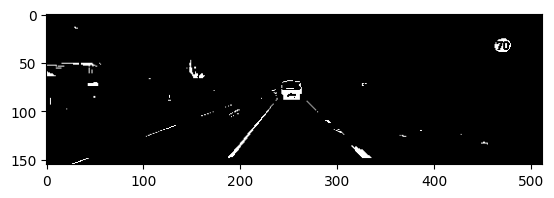

In [47]:
imgBin = binarize(imgAfter, 245)

In [76]:
imgHistoDyn = cv.imread("ressources/Ihistdyn.png", 0)

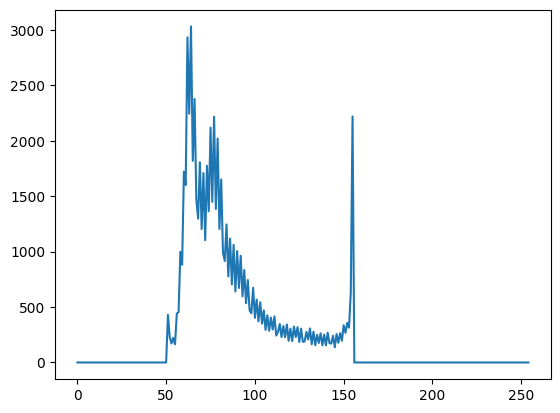

In [52]:
imgsplit2 = cv.split(imgHistoDyn)
histo2 = cv.calcHist(imgsplit2,[0],None,[255],(0,256))
plt.plot(histo2)

In [55]:
def determinerNiveauGrisMinMax(histo):
    a = 0
    b = 254
    while histo[a] == 0 :
        a += 1

    while histo[b] == 0 :
        b -= 1

    return a,b

In [56]:
a,b=determinerNiveauGrisMinMax(histo2)

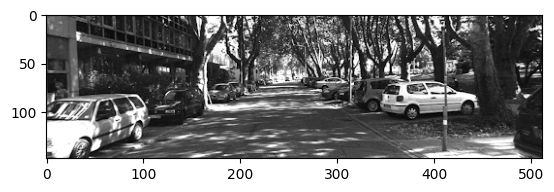

In [72]:
from numpy import int_, round_


def transfoDyn(img, a, b, M):
    return np.float32(round_(M*((img-a)/(b-a))))

imgPostDyn = transfoDyn(imgHistoDyn,a,b,255)
plt.imshow(imgPostDyn, cmap="gray")

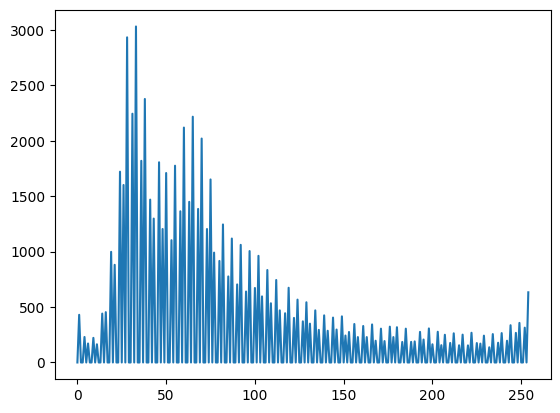

In [91]:
imgsplit3 = cv.split(imgPostDyn)
histo3 = cv.calcHist(imgsplit3,[0],None,[255],(0,256))
plt.plot(histo3)

In [83]:
print("Moyenne de l'histogramme initial :", int(np.mean(imgHistoDyn)))
print("Moyenne de l'histogramme final :", int(np.mean(imgPostDyn)))

print("Ecart Type histo init :", int(np.std(imgHistoDyn)))
print("Ecart Type histo final :", int(np.std(imgPostDyn)))

Moyenne de l'histogramme initial : 87
Moyenne de l'histogramme final : 89
Ecart Type histo init : 26
Ecart Type histo final : 65


**III. Histogramme cumulé**

In [99]:
def getHisto(img):
    imgsplit = cv.split(img)
    return cv.calcHist(imgsplit,[0],None,[255],(0,256))

def printHisto(img):
    plt.plot(getHisto(img))

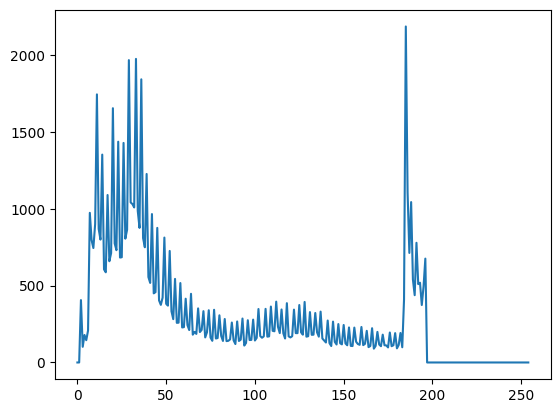

In [110]:
imgHistoEgal = cv.imread("ressources/Ihistegal.png", 0)

#plt.imshow(imgHistoEgal, cmap="gray")
histEgal = getHisto(imgHistoEgal)
printHisto(imgHistoEgal)

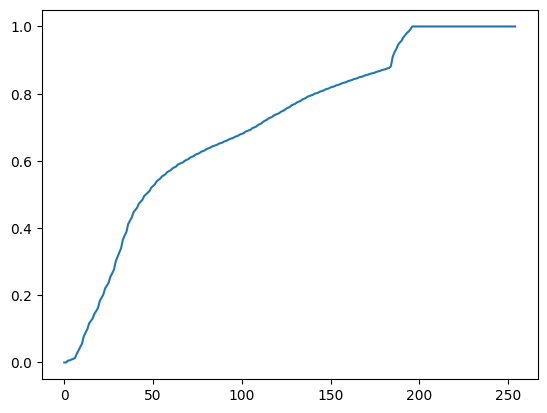

In [111]:
def calcHistCumule(histo, lImg = 512, hImg = 155):
    compteur = 0
    nbTotPix = lImg * hImg
    histoRes = []

    for val in histo:
        compteur += val[0]
        histoRes.append(compteur/nbTotPix)

    return np.array(histoRes)
histCumule = calcHistCumule(histEgal)
plt.plot(histCumule)


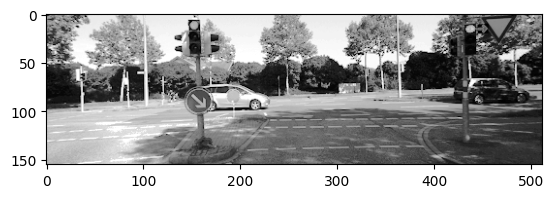

In [120]:
def calculImgEqHistoCum(histo, img):
    image = []
    for ligne in img:
        newLigne = [round(255*histo[val]) for val in ligne]
        image.append(newLigne)
    plt.imshow(image,cmap='gray')

calculImgEqHistoCum(histCumule,imgHistoEgal)

**Methode d'Otsu**

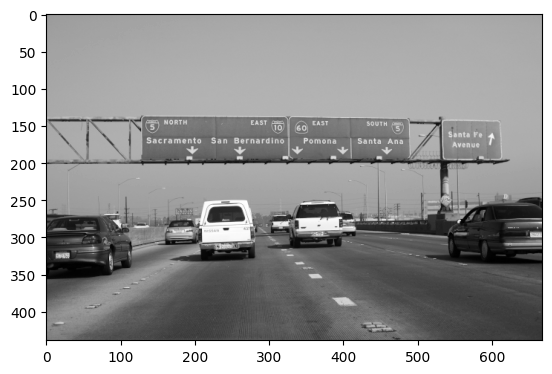

In [163]:
nomImage_outsu = "otsu4.png"

imgOtsu = cv.imread(f"ressources/otsu/{nomImage_outsu}",0)
hauteur_Otsu,largeur_Otsu = imgOtsu.shape

plt.imshow(imgOtsu,cmap='gray')


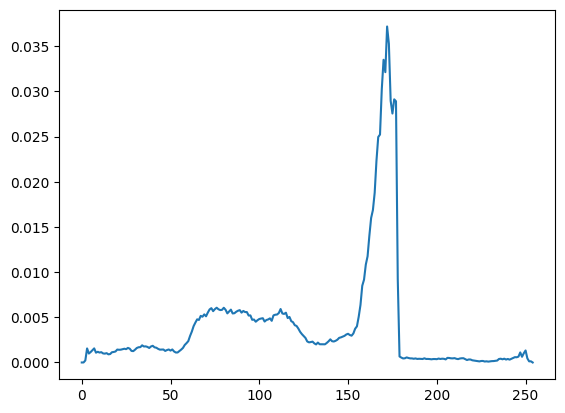

In [164]:
histoOtsu = getHisto(imgOtsu)/(hauteur_Otsu*largeur_Otsu)
plt.plot(histoOtsu)

In [165]:
def computeOhmegaBackground(T : int, histo):
    sum = 0
    for i in range(T+1):
        sum += histo[i]
    return sum

In [166]:
def computeMu(ohmega, borneMin, borneMax, histo):
    sum = 0
    #print(borneMax)
    for i in range(borneMin,borneMax):
        sum += i * histo[i]
    return sum/ohmega

In [167]:
def Otsu(histo):
    sigma2Bmax = 0
    Tmax = 0
    for T in range(255):
        ohmB = computeOhmegaBackground(T,histo)
        ohmF = 1- ohmB

        muB = computeMu(ohmB,0,T,histo)
        muF = computeMu(ohmF,T+1,255,histo)

        sigma2B = ohmB*ohmF*(muB-muF)**2
        if sigma2B > sigma2Bmax:
            sigma2Bmax = sigma2B
            Tmax = T
    return Tmax

C:\Users\slefebvr\AppData\Local\Temp\ipykernel_3468\1533004705.py:6: RuntimeWarning: invalid value encountered in true_divide
  return sum/ohmega


array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

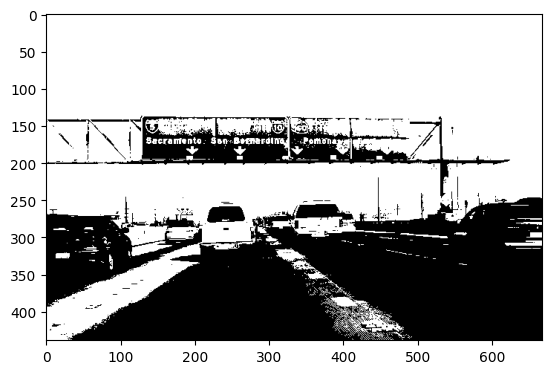

In [168]:
seuilOtsu = Otsu(histoOtsu)

binarize(imgOtsu,seuilOtsu)